# 🎹 CIS 5450 Final Project: Spotify Song Genres 🎹
Will Cai, Kavya Ravishankar, Gabby Gu


# Project Goal

What are the defining characteristics of a musical genre? Given the musical elements of a song such as tempo, key, energy level, and more, can we predict what the genre will be?

Our project goal is to analyze that question using [Kaggle's Spotify Huge Database](https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years) which includes information on songs from various genres over a period of three years.

We will use machine learning and data analysis techniques to identify patterns and correlations between the musical characteristics of songs and their associated genres. In essence, the project seeks to uncover the key factors that distinguish one genre from another and explore the feasibility of creating a predictive model for genre classification.



# Part 1: Retrieving the Data
## Importing Libraries

First, we are installing the Kaggle Python package, mounting Google Drive to the Colab environment, creating a directory for Kaggle credentials, and copying the Kaggle API key from Google Drive to the appropriate directory to be able to access the Kaggle datasets within our Colab notebook.

In [2]:
import pandas as pd
import numpy as np

In [3]:
!apt update
!pip install kaggle

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,036 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://p

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [7]:
!!kaggle datasets download -d pepepython/spotify-huge-database-daily-charts-over-3-years

['Downloading spotify-huge-database-daily-charts-over-3-years.zip to /content',
 '',
 '  0% 0.00/191M [00:00<?, ?B/s]',
 '  1% 1.00M/191M [00:00<02:11, 1.51MB/s]',
 '  1% 2.00M/191M [00:00<01:06, 2.97MB/s]',
 '  2% 4.00M/191M [00:00<00:31, 6.24MB/s]',
 '  4% 8.00M/191M [00:01<00:14, 13.1MB/s]',
 '  6% 11.0M/191M [00:01<00:11, 15.9MB/s]',
 '  7% 14.0M/191M [00:01<00:09, 19.4MB/s]',
 '  9% 18.0M/191M [00:01<00:07, 23.3MB/s]',
 ' 11% 21.0M/191M [00:01<00:10, 17.1MB/s]',
 ' 13% 25.0M/191M [00:01<00:10, 17.1MB/s]',
 ' 14% 27.0M/191M [00:02<00:09, 17.8MB/s]',
 ' 15% 29.0M/191M [00:02<00:10, 15.8MB/s]',
 ' 17% 33.0M/191M [00:02<00:08, 20.3MB/s]',
 ' 19% 36.0M/191M [00:02<00:07, 21.3MB/s]',
 ' 21% 40.0M/191M [00:02<00:06, 24.8MB/s]',
 ' 22% 43.0M/191M [00:02<00:06, 24.0MB/s]',
 ' 24% 46.0M/191M [00:02<00:06, 24.9MB/s]',
 ' 26% 49.0M/191M [00:02<00:05, 25.2MB/s]',
 ' 27% 52.0M/191M [00:03<00:07, 19.1MB/s]',
 ' 29% 55.0M/191M [00:03<00:07, 19.1MB/s]',
 ' 30% 58.0M/191M [00:03<00:06, 21.2MB/s]',


In [8]:
!unzip /content/spotify-huge-database-daily-charts-over-3-years.zip

Archive:  /content/spotify-huge-database-daily-charts-over-3-years.zip
  inflating: Database to calculate popularity.csv  
  inflating: Final database.csv      


In [9]:
df_spotify = pd.read_csv('/content/Final database.csv')
df_spotify

<ipython-input-9-e00ee7af4c8a>:1: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_spotify = pd.read_csv('/content/Final database.csv')


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,...,0,0,1,0,0,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,...,0,0,1,0,0,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38.0,False,Freedom,...,0,0,1,0,0,0,133,0.0,0.0,english speaking and nordic
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,...,0,0,1,0,0,0,174,0.0,0.0,english speaking and nordic


##Viewing the Data
Now that we can create our first dataframe, we can get a look at what data is available to us.

In [10]:
df_popularity = pd.read_csv('/content/Database to calculate popularity.csv')

# Display the dataframe
df_popularity

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber
...,...,...,...,...,...,...,...,...
9806996,9806996,Taiwan,01/01/2017,197.0,https://open.spotify.com/track/3zHq9ouUJQFQRf3...,"Love Me Like You Do - From ""Fifty Shades Of G...","Love Me Like You Do - From ""Fifty Shades Of G...",Ellie Goulding
9806997,9806997,Taiwan,01/01/2017,198.0,https://open.spotify.com/track/3CRDbSIZ4r5MsZ0...,"Stressed Out , Twenty One Pilots",Stressed Out,Twenty One Pilots
9806998,9806998,Taiwan,01/01/2017,199.0,https://open.spotify.com/track/2mEvsc8k8iwR099...,"The End - From ""La La Land"" Soundtrack , Just...","The End - From ""La La Land"" Soundtrack",Justin Hurwitz
9806999,9806999,Taiwan,01/01/2017,200.0,https://open.spotify.com/track/0L7loeTIg6akW84...,"Light It Up - Remix , Major Lazer",Light It Up - Remix,Major Lazer


# Part 2: Understanding the Data
Below, we are using some commands to get basic information about our dataframe `df_spotify`. We now have a better understanding about how large our dataset is, how many values we are potentially looking at, and what kind of datatypes we are going to be dealing with.

In [11]:
df_spotify.describe()

,Popularity,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,...,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy
count,170633.000000,167411.000000,167411.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,...,170633.00000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,1337.530228,0.845667,0.651287,0.348684,0.549149,0.015026,0.435795,0.001242,0.011621,...,0.02513,0.040848,0.045044,0.044505,0.019721,0.038328,0.038943,89.926738,0.087035,0.294843
std,13115.854526,2453.554101,0.361269,0.476564,0.476555,0.497580,0.121658,0.495862,0.035226,0.107175,...,0.15652,0.197938,0.207401,0.206215,0.139039,0.191987,0.193460,57.998729,0.281887,0.455974
min,0.800000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,77.600000,428.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,515.150000,834.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,3867.850000,1240.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138.000000,0.000000,1.000000
max,233766.900000,44128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000,1.000000


In [12]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB


In [13]:
df_spotify.dtypes

Country         object
Uri             object
Popularity     float64
Title           object
Artist          object
                ...   
USA              int64
Popu_max         int64
Top10_dummy    float64
Top50_dummy    float64
Cluster         object
Length: 151, dtype: object

# Part 3: Data Cleaning and Wrangling
With such a large dataset, we need to clean up the data so that we can properly analyze them later. We chose to define a unique song by its title and artist, so we will drop the duplicates based on those two variables.


In [14]:
df_spotify_nodupes = df_spotify.drop_duplicates(subset={'Title', 'Artist'}, keep='first', inplace=False)
df_spotify_nodupes

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0,0,0,0,0,0,72,0.0,0.0,global
39,Global,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,56.00,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,...,0,0,0,0,0,0,131,0.0,0.0,global
58,Global,https://open.spotify.com/track/6JSryEdVJTZq6YB...,78.40,arrows,Foo Fighters,album,alternative metal,8092392.0,False,Concrete and Gold,...,0,0,0,0,0,0,103,0.0,0.0,global
80,Global,https://open.spotify.com/track/7nAfXgeHfDO50up...,244.95,talking to myself,Linkin Park,album,alternative metal,17132813.0,False,One More Light,...,0,0,0,0,0,0,86,0.0,0.0,global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,...,0,0,1,0,0,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,...,0,0,1,0,0,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38.0,False,Freedom,...,0,0,1,0,0,0,133,0.0,0.0,english speaking and nordic
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,...,0,0,1,0,0,0,174,0.0,0.0,english speaking and nordic


Now we are filtering the dataframe by only keeping the columns that we are interested in.

In [15]:
df_spotify_filtered = df_spotify_nodupes[['Artist', 'Title', 'Country', 'Popularity', 'Album/Single', 'Genre_new', 'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'Explicit_true']].dropna()
df_spotify_filtered

,Artist,Title,Country,Popularity,Album/Single,Genre_new,danceability,energy,key,mode,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,Explicit_true
0,Paulo Londra,adan y eva,Global,31833.95,single,hip hop,0.767,0.709,1,1,-4.47,0.336,0.323,0.0,0.0676,0.72,171.993,258639,0
16,The Chainsmokers - Louane,it wont kill ya,Global,418.00,album,pop,0.572,0.53,6,0,-8.521,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613,0
39,Kesha,hymn,Global,56.00,single,pop,0.488,0.538,6,1,-4.974,0.076,0.147,0.0,0.305,0.38,67.037,205600,1
58,Foo Fighters,arrows,Global,78.40,album,metal,0.515,0.917,1,1,-7.312,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,0
80,Linkin Park,talking to myself,Global,244.95,album,metal,0.593,0.712,2,0,-6.325,0.0286,0.00184,0.0,0.128,0.473,124.013,231307,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Luke Christopher,smalltown,Taiwan,31.20,single,pop,0.617,0.598,6,1,-6.677,0.1,0.148,0.0,0.333,0.526,79.974,140825,1
170629,G.E.M.,灰狼,Taiwan,156.00,album,pop,0.679,0.602,5,0,-8.849,0.148,0.0952,0.000539,0.0921,0.316,133.951,203418,0
170630,張赫宣,預念患者,Taiwan,90.40,album,else,0.421,0.17,1,1,-13.24,0.0384,0.918,0.0,0.102,0.27,131.917,309526,0
170631,Crowd Lu,清晨巴士,Taiwan,21.60,album,indie,0.38,0.291,0,1,-9.088,0.035,0.839,0.0,0.0935,0.417,66.537,264480,0


Now we want to strip the leading and trailing white spaces in the Title and Artist.

In [16]:
df_spotify_filtered['Title'] = df_spotify_filtered['Title'].str.strip()
df_spotify_filtered['Artist'] = df_spotify_filtered['Artist'].str.strip()
df_spotify_filtered.dtypes

Artist               object
Title                object
Country              object
Popularity          float64
Album/Single         object
Genre_new            object
danceability         object
energy               object
key                  object
mode                 object
loudness             object
speechiness          object
acoustics            object
instrumentalness     object
liveliness           object
valence              object
tempo                object
duration_ms          object
Explicit_true         int64
dtype: object

In [17]:
df_spotify_cleaned = df_spotify_filtered.copy()
df_spotify_cleaned['Album/Single'] = df_spotify_cleaned['Album/Single'].apply(lambda x: 1 if x == 'Album' else 0)
df_spotify_cleaned['danceability'] = pd.to_numeric(df_spotify_cleaned['danceability'], errors='coerce')
df_spotify_cleaned['energy'] = pd.to_numeric(df_spotify_cleaned['energy'], errors='coerce')
df_spotify_cleaned['key'] = pd.to_numeric(df_spotify_cleaned['key'], errors='coerce')
df_spotify_cleaned['mode'] = pd.to_numeric(df_spotify_cleaned['mode'], errors='coerce')
df_spotify_cleaned['loudness'] = pd.to_numeric(df_spotify_cleaned['loudness'], errors='coerce')
df_spotify_cleaned['speechiness'] = pd.to_numeric(df_spotify_cleaned['speechiness'], errors='coerce')
df_spotify_cleaned['acoustics'] = pd.to_numeric(df_spotify_cleaned['acoustics'], errors='coerce')
df_spotify_cleaned['instrumentalness'] = pd.to_numeric(df_spotify_cleaned['instrumentalness'], errors='coerce')
df_spotify_cleaned['liveliness'] = pd.to_numeric(df_spotify_cleaned['liveliness'], errors='coerce')
df_spotify_cleaned['valence'] = pd.to_numeric(df_spotify_cleaned['valence'], errors='coerce')
df_spotify_cleaned['tempo'] = pd.to_numeric(df_spotify_cleaned['tempo'], errors='coerce')
df_spotify_cleaned['duration_ms'] = pd.to_numeric(df_spotify_cleaned['duration_ms'], errors='coerce')
df_spotify_cleaned = df_spotify_cleaned.rename(columns={'Explicit_true': 'explicit'})

df_spotify_cleaned.dtypes

Artist               object
Title                object
Country              object
Popularity          float64
Album/Single          int64
Genre_new            object
danceability        float64
energy              float64
key                 float64
mode                float64
loudness            float64
speechiness         float64
acoustics           float64
instrumentalness    float64
liveliness          float64
valence             float64
tempo               float64
duration_ms         float64
explicit              int64
dtype: object

In [18]:
df_spotify_cleaned = df_spotify_cleaned.dropna()

# Part 4: Exploratory Data Analysis

In [19]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=a04cc2750f80842bff378a9407ac786df55e6c6e6d4b368bc1a4acf17ef1011b
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [20]:
import pandas as pd
import pandasql as ps

query = '''
SELECT Genre_new,
       AVG(danceability) AS AvgDanceability,
       AVG(energy) AS AvgEnergy,
       AVG(speechiness) AS AvgSpeechiness,
       AVG(acoustics) AS AvgAcoustics,
       AVG(instrumentalness) AS AvgInstrumentalness
FROM df_spotify_cleaned
GROUP BY Genre_new
ORDER BY AvgDanceability DESC;
'''

result = ps.sqldf(query, globals())

print(result)


ObjectNotExecutableError: ignored

## 3D Scatterplot
We want to get an initial overview of what characteristics certain genres have. Below, we generated a 3D scatterplot that plots the relationship between the energy, speechiness, and acoustics of all the songs. Each dot represents a different song and is color-coded by the genre.

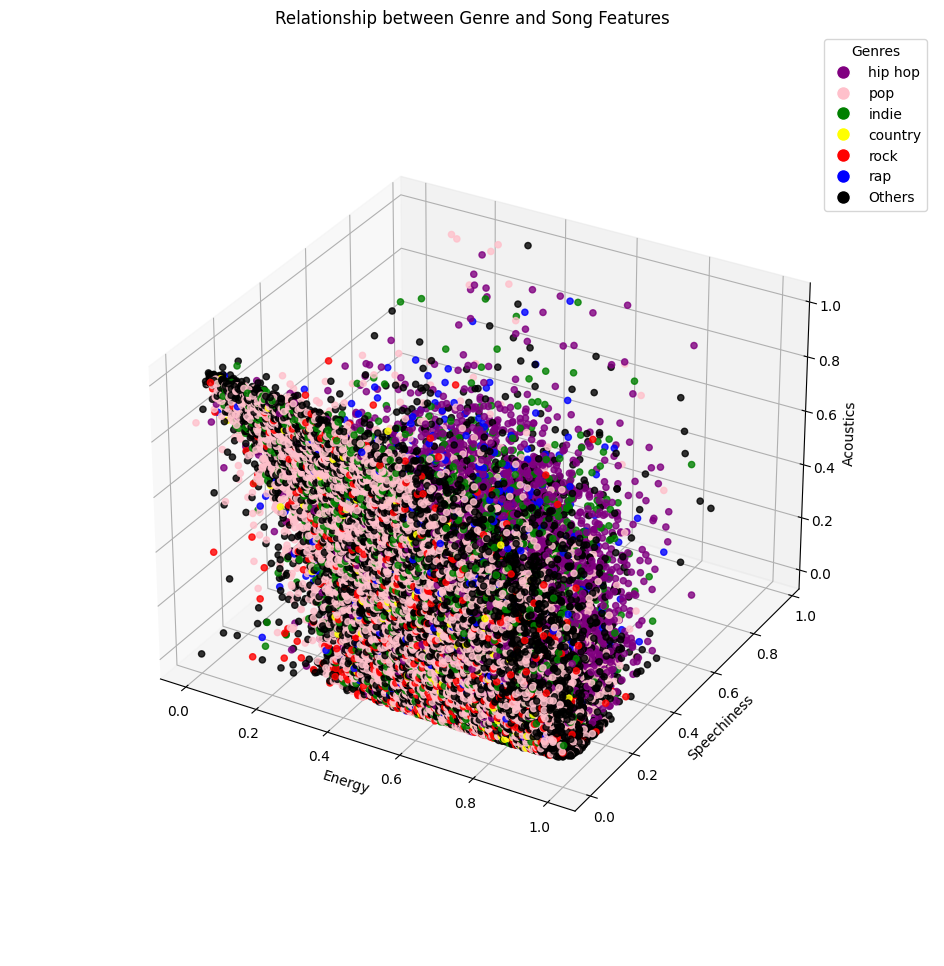

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

color_mapping = {
    'hip hop': 'purple',
    'pop': 'pink',
    'indie': 'green',
    'country': 'yellow',
    'rock': 'red',
    'rap': 'blue'
}
default_color = 'black'

df_spotify_cleaned['color'] = df_spotify_cleaned['Genre_new'].apply(lambda x: color_mapping.get(x, default_color))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_spotify_cleaned['energy'],
    df_spotify_cleaned['speechiness'],
    df_spotify_cleaned['acoustics'],
    c=df_spotify_cleaned['color'],
    alpha=0.8
)

ax.set_xlabel('Energy')
ax.set_ylabel('Speechiness')
ax.set_zlabel('Acoustics')
ax.set_title('Relationship between Genre and Song Features')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=genre,
                              markersize=10, markerfacecolor=color) for genre, color in color_mapping.items()]
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Others',
                                  markersize=10, markerfacecolor=default_color))
ax.legend(handles=legend_elements, title="Genres")

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()

## Count Plot

Now we want to explore the distribution of keys among songs in each genre. The count plot below counts the percentage of a genre that is a certain key. Through this we can see that D#/E♭ has the lowest song count across all genres.


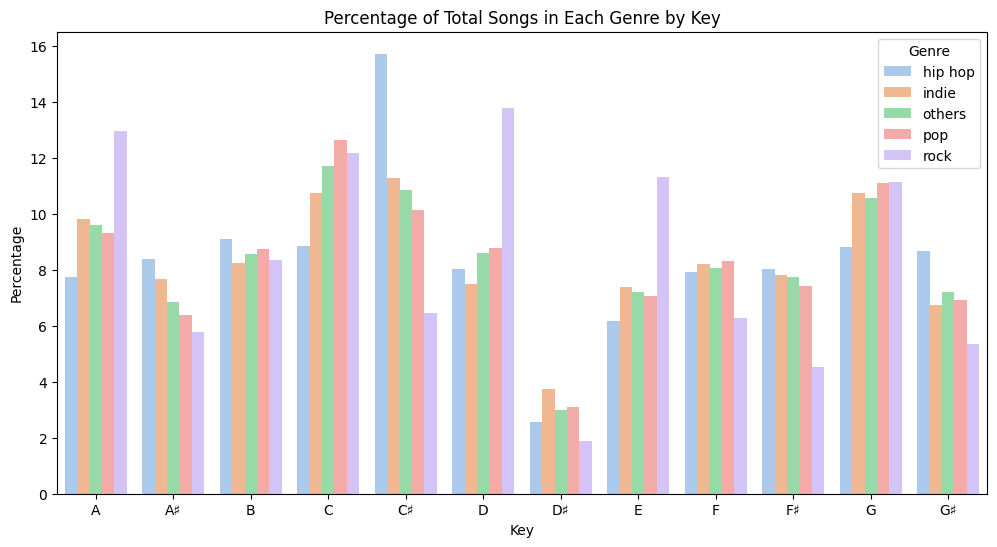

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

specific_genres = ['hip hop', 'pop', 'indie', 'rock']
def categorize_genre(genre):
    if genre in specific_genres:
        return genre
    else:
        return 'others'
df_spotify_cleaned['Genre_new'] = df_spotify_cleaned['Genre_new'].apply(categorize_genre)
df_spotify_cleaned_specificgenres = df_spotify_cleaned.copy()

key_mapping = {0: 'C', 1: 'C♯', 2: 'D', 3: 'D♯', 4: 'E', 5: 'F', 6: 'F♯', 7: 'G', 8: 'G♯', 9: 'A', 10: 'A♯', 11: 'B'}

df_spotify_cleaned_specificgenres['key'] = df_spotify_cleaned_specificgenres['key'].map(key_mapping)

total_genre_counts = df_spotify_cleaned_specificgenres['Genre_new'].value_counts()

genre_key_counts = df_spotify_cleaned_specificgenres.groupby(['key', 'Genre_new']).size().reset_index(name='count')

genre_key_counts['percentage'] = genre_key_counts.apply(lambda row: (row['count'] / total_genre_counts[row['Genre_new']]) * 100, axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_key_counts, x='key', y='percentage', hue='Genre_new', palette='pastel')

plt.title('Percentage of Total Songs in Each Genre by Key')
plt.xlabel('Key')
plt.ylabel('Percentage')

plt.legend(title='Genre', loc='upper right')

plt.show()

## Song Feature Heatmap

The heat map generated below shows the correlation between a bunch of song characteristics. We have chosen the characteristics that have numerical values.

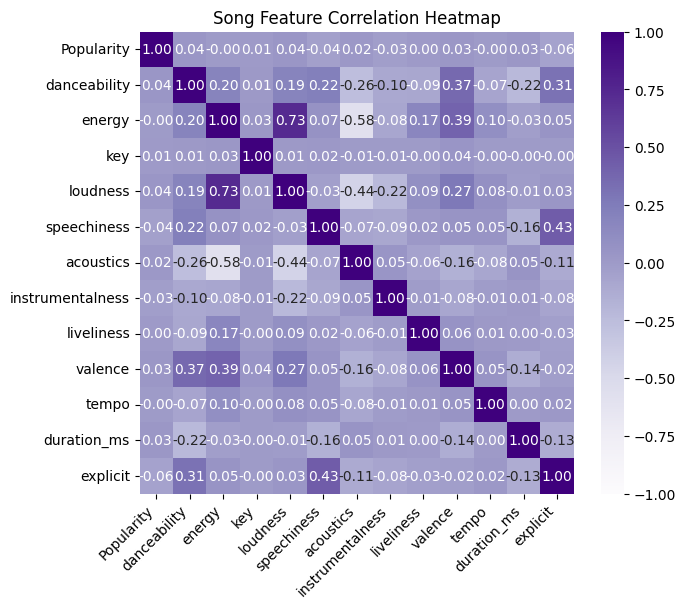

In [23]:
df_spotify_numeric = df_spotify_cleaned[['Popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'explicit']]

corr_mat = df_spotify_numeric.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr_mat, annot=True, cmap="Purples", vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Song Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

We see that loudness and energy are the most correlated variables. While this finding is interesting, it is important to note that there is no immediate concern or need to remove either of these variables from our analysis.

# Part 5: Data Modeling

Now, we'll train some machine learning models using sklearn, using genre as our target variable.

First, we install a bunch of libraries.

In [24]:
%%capture

!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [25]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('cis545-huge-spotify').getOrCreate()
sqlContext = SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


## Logistic Regression
This will be our baseline model. Since we want to figure out if certain features can define a genre, we will be using a logistic regression. This is because our target variable is categorical.

In [26]:
# these are the features we are interested in
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms']

# dataframe w these features
X = df_spotify_cleaned[features]

# target variable
y = df_spotify_cleaned['Genre_new']


To split data into train and test set, we will use sklearn's train_test_split library. The split will be 80% for training and 20% for testing.

In [27]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(penalty=None, multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     hip hop       0.00      0.00      0.00      3064
       indie       0.00      0.00      0.00       919
      others       0.34      1.00      0.50      3787
         pop       0.00      0.00      0.00      3155
        rock       0.00      0.00      0.00       323

    accuracy                           0.34     11248
   macro avg       0.07      0.20      0.10     11248
weighted avg       0.11      0.34      0.17     11248

[[   0    0 3064    0    0]
 [   0    0  919    0    0]
 [   0    0 3787    0    0]
 [   0    0 3155    0    0]
 [   0    0  323    0    0]]


In [55]:
log_acc = model.score(X_test, y_test)
print('Accuracy score: ' + str(log_acc))

Accuracy score: 0.33668207681365575


We will try to improve this accuracy score.

##PCA To Reduce Dimensionality
Principal Component Analysis will reduce the number of dimensions of our features, getting rid of correlated features.

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# standarize training data
X_train_standardized = scaler.fit_transform(X_train)

pca = PCA()

pca.fit(X_train_standardized)


PCA()

In [51]:
# obtain the explained variance ratios from the fitted PCA model
explained_variance_ratios = pca.explained_variance_ratio_

# calculate the cumulative explained variance
cum_evr = explained_variance_ratios.cumsum()

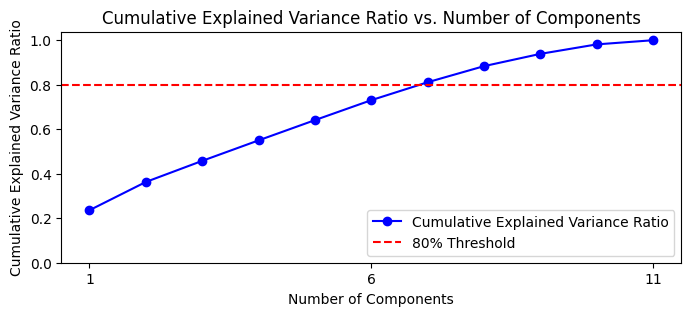

In [52]:
import matplotlib.pyplot as plt

cum_evr = explained_variance_ratios.cumsum()

plt.figure(figsize=(8, 3))
plt.plot(range(1, len(cum_evr) + 1), cum_evr, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()

plt.xticks(range(1, len(cum_evr) + 1, 5))

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()


From this graph, we can see that we should use 7 components.

In [33]:
from sklearn.decomposition import PCA

n_components = 7

pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_standardized)
X_test_scaled = scaler.transform(X_test)

X_test_pca = pca.transform(X_test_scaled)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_pca = LogisticRegression(penalty=None, multi_class='multinomial', max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)
y_pred = log_reg_pca.predict(X_test_pca)
log_pca_acc = accuracy_score(y_test, y_pred)

print(f'Acccuracy Score: {log_pca_acc}')


Acccuracy Score: 0.44105618776671407


This has increased our accuracy greatly.

## Decision Tree
Supervised machine learning.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create and train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=25)
tree_model.fit(X_train_pca, y_train)

# predictions
y_pred1 = tree_model.predict(X_test_pca)

# evaluate the model
tree_acc = accuracy_score(y_test, y_pred1)
print(f"Accuracy score: {tree_acc}")

Accuracy score: 0.37731152204836416


We will use grid search to hypertune this model to hopefully get a higher accuracy.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms']
X = df_spotify_cleaned[features]
y = df_spotify_cleaned['Genre_new']

# impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

# define the parameter grid
depth = [1, 2, 4, 6, 8, 10, 12, 15]
sample = [1, 2, 3, 4, 5, 6, 7, 8]
param_grid = {'max_depth': depth, 'min_samples_leaf': sample}

dt_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)  # You can adjust cv as needed

dt_cv.fit(X_imputed, y)

# getting the best parameters and accuracy
dt_best_params = dt_cv.best_params_
dt_acc = dt_cv.best_score_

print('Best Parameters: ', dt_best_params)
print('Best Accuracy: ', dt_acc)


Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 3}
Best Accuracy:  0.45855981857529643


## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(
    class_weight='balanced',   # balanced class weights to handle imbalanced classes
    n_estimators=300,          # number of decision trees in the forest
    max_depth=30,               # maximum depth of each decision tree
    random_state=42             # random seed for reproducibility
)

rf_model.fit(X_train_pca, y_train)

y_pred = rf_model.predict(X_test_pca)

rf_acc = rf_model.score(X_test_pca, y_test)

# confusion matrix
rf_confusion = confusion_matrix(y_test, y_pred)


print('Best Accuracy: ', rf_acc)
print(rf_confusion)


Best Accuracy:  0.47448435277382645
[[2108    5  523  428    0]
 [ 303    9  246  358    3]
 [ 939    8 1473 1365    2]
 [ 462    0  947 1744    2]
 [  12    0  155  153    3]]


We will also improve this random forest model by using grid search.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd


param_grid = {
    'max_depth': [5, 10, 20, 30],
    'n_estimators': [80, 100, 200, 300]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_pca, y_train)

# best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test_pca)

# new accuracy
new_accuracy = accuracy_score(y_test, y_pred_best)
print(f"New Accuracy with Best Parameters: {new_accuracy:.3f}")

# confusion Matrix with  best model
best_rf_confusion = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix:\n{best_rf_confusion}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


#Part 6: Comparing the Models

Now that we have tried several different models, we can compare them to detemine which model was the best for us to analyze our question. Below we have made a bar graph to easily visualize the difference in accuracy scores over the models.

In [ ]:
# bar graph of modeling methods and their accuracies
data = {'Log Regression':round(log_acc, 5),
        'PCA Log Regression':round(log_pca_acc, 5),
        'Decision Tree':round(tree_acc, 5),
        'Decision Tree Hypertuned':round(dt_acc, 5),
        'Random Forest':round(rf_acc, 5),
        'Random Forest Hypertuned':round(new_accuracy, 5)}

model_method = list(data.keys())
acc = list(data.values())

fig = plt.figure(figsize = (14, 5))

# creating the bar plot
plt.bar(model_method, acc, color ='darkolivegreen', width = 0.4)

# labels
plt.xlabel("Modeling Method")
plt.ylabel("Accuracy Score")
plt.title("Which Modeling Method Was Best?")
plt.show()


It looks like .. was the best

#Part 7: Conclusion
##Obstacles


*   Determining dataset: finding a large enough Spotify dataset that could provide meaningul analysis even after cleaning.
*  Determining target: we found many features to work with, but few were interesting and allowed us to go in depth.
*  Graph Troubles: clearly representing relations in the data was difficult because of the sheer amount of features.
* Some Disappointing Models: for example, running the Decision Tree Classifer after PCA made it worse.

##Next Steps
We have a few ideas on how this project can be expanded.

* Improve Prediction Accuracy: utilize more complex data modeling methods and techniques to grow the accuracy rate of genre classification.
* Expand Objectives: combine the Spotify database with a dataset about the popularity of various genres based on geography in order predict global song popularity.
* Real World Applications: create a tool that can listen to a song, collect the numerical characteristics (scale, tone, etc.), and classify it correctly in order to provide more robust song recommendations


